0. read a market basket database from the csv file provided and
generate a dataframe basket of boolean values with one row
per transaction and one column per distinct item of the
database; the dataframe values must be True if a distinct item
is contained in the transaction
• the file contains one transaction per line, the first
element is the number of items in the transaction,
followed by the items of the transaction, and then a
variable number of empty fields
• the field names in the first row of the csv file are not
relevant
1. ignore the transactions containing a single item
(2 points)
2. the column names of the output dataframe are the distinct items
(2 points)
3. show the first five rows of the output dataframe
(1 point)
4. show the number of transactions and of distinct items
(1 point)
5. find a value of min_support such that the apriori algorithm
generates at least 8 frequent itemsets with at least 2 items
(5 points)
• output the result with the message below
• min_support: 0.xxxx - number of itemsets with at least 2
items: nn)
6. find the minimum metric threshold such that at least 10
association rules are extracted from the frequent itemsets found
(5 points)
• use "confidence" as metric and output the line below:
• Metric: "confidence" - min_metric: 0.xxxx - Number of
rules: n
7. print the first 10 rules found, sorted by descending confidence
and support
(3 points)
8. plot confidence and support for all the sorted rules found
(3 points)
9. scatter plot the rules by confidence and support, labelling the
points with the index value of the corresponding rule
(hint https://stackoverflow.com/questions/14432557/matplotlib-
scatter-plot-with-different-text-at-each-data-point)
(3 points)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')

random_state = 42
filename = './datasets/mba.csv'
separa = ','
np.random.seed(random_state)
%matplotlib inline

# 0

In [10]:
file = open(filename, mode = 'r')
transactions = [line.strip('\n').split(separa) for line in file.readlines()]
transactions = transactions[1:]
file.close()

for i in range(len(transactions)):
    end_index = int(transactions[i][0]) + 1
    transactions[i] = transactions[i][1:end_index]

te = TransactionEncoder()
encoded_transactions = te.fit(transactions).transform(transactions)

basket = pd.DataFrame(encoded_transactions)
basket.head()

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


# 1

In [11]:
single_item = []

for index,transaction in basket.iterrows():
    if np.count_nonzero(transaction) == 1:
        single_item.append(index)

basket = basket.drop(index=single_item,axis=0)

# 2

In [12]:
basket.columns = te.columns_

# 3

In [15]:
basket.head(4)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


# 4

In [18]:
print(f'Number of transactions: {basket.shape[0]}')
print(f'Number of distinct items: {len(np.unique(basket.columns))}')

Number of transactions: 7676
Number of distinct items: 169


# 5

In [19]:
min_itemsets = 8
min_items_in_itemset = 2
support_range = np.arange(0.1, 0.01, -0.01)

In [23]:
min_support = 0
for support in support_range:
    frequent_itemsets = apriori(basket, min_support=support, use_colnames=True)
    itemset_above_threshold = sum([len(itemset)>=min_items_in_itemset for itemset in frequent_itemsets['itemsets']])
    if itemset_above_threshold >= min_itemsets:
        min_support = support
        break
if min_support == 0:
    print('No frequent itemsets found.')
else:
    print(f'Minimum support: {min_support:.4f} with {itemset_above_threshold} itemsets.')

Minimum support: 0.0500 with 9 itemsets.


# 6

In [24]:
min_rules = 10
confidence_range = np.arange(1, 0.01, -0.01)

min_confidence = 0

for confidence in confidence_range:
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
    if len(rules) >= min_rules:
        min_confidence = confidence
        break

if min_confidence == 0:
    print('No rules found.')
else:
    print(f'Minimum confidence: {min_confidence:.4f} with {len(rules)} rules.')

Minimum confidence: 0.2500 with 10 rules.


# 7

In [26]:
sorted_rules = rules.sort_values(by=['confidence', 'support'], ascending=False)
sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(root vegetables),(whole milk),0.136399,0.311621,0.062663,0.459408,1.474254,0.020158,1.273380
1,(root vegetables),(other vegetables),0.136399,0.239838,0.060709,0.445081,1.855754,0.027995,1.369861
9,(yogurt),(whole milk),0.173528,0.311621,0.071782,0.413664,1.327459,0.017707,1.174035
8,(tropical fruit),(whole milk),0.131449,0.311621,0.054195,0.412289,1.323049,0.013233,1.171290
3,(other vegetables),(whole milk),0.239838,0.311621,0.095883,0.399783,1.282915,0.021145,1.146884
5,(rolls/buns),(whole milk),0.221470,0.311621,0.072564,0.327647,1.051429,0.003549,1.023836
4,(yogurt),(other vegetables),0.173528,0.239838,0.055628,0.320571,1.336610,0.014009,1.118823
2,(whole milk),(other vegetables),0.311621,0.239838,0.095883,0.307692,1.282915,0.021145,1.098011
0,(other vegetables),(root vegetables),0.239838,0.136399,0.060709,0.253123,1.855754,0.027995,1.156283
7,(soda),(whole milk),0.203101,0.311621,0.051329,0.252726,0.811006,-0.011962,0.921187


 # 8

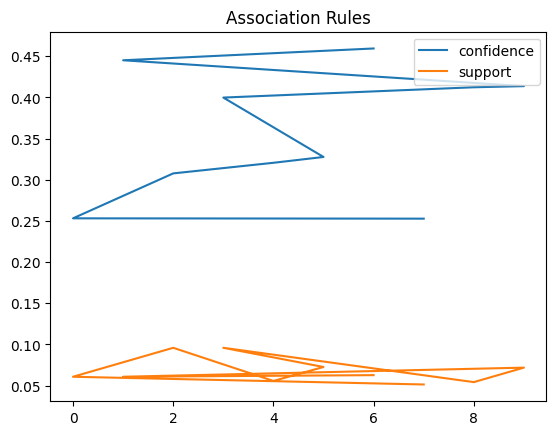

In [31]:
sorted_rules[['confidence','support']].plot(title='Association Rules');

# 9

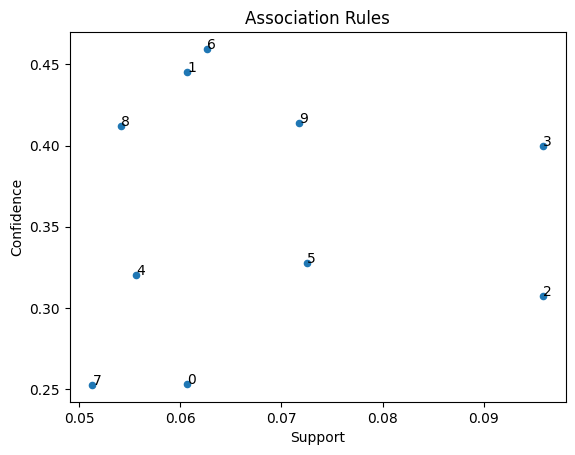

In [32]:
fig = sorted_rules.plot.scatter(x='support', y='confidence', title='Association Rules');
fig.set_xlabel('Support');
fig.set_ylabel('Confidence');
for i in range(len(sorted_rules)):
    fig.annotate(i, (sorted_rules['support'][i], sorted_rules['confidence'][i]))